In [4]:
import tangram as tg
import scanpy as sc

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib notebook

In [2]:
data_path = 'C://Users/stephanies/data/'

In [3]:
ad_sp = sc.read_h5ad(data_path + 'BGI_data/cDNA5/bin100.h5ad')
ad_sp

AnnData object with n_obs × n_vars = 24479 × 16036
    obs: 'x', 'y'

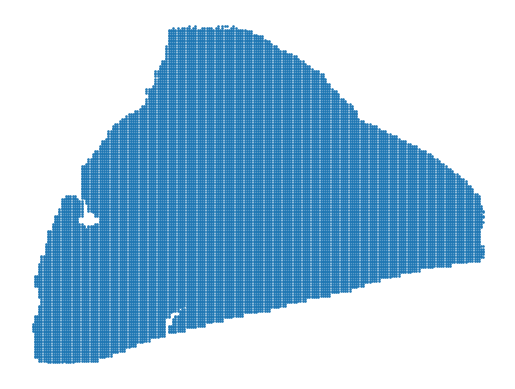

In [4]:
xs = ad_sp.obs.x.values
ys = ad_sp.obs.y.values
plt.axis('off')
plt.scatter(xs, ys, s=.7);

In [5]:
ad_sc = sc.read_h5ad(data_path + 'macaque_sc/macaque_sc_all.h5ad')
ad_sc

AnnData object with n_obs × n_vars = 89695 × 40280
    obs: 'cluster', 'subclass', 'neighborhood', 'class'
    layers: 'log_cpm'

In [22]:
len(ad_sc.var)

40280

In [15]:
np.unique(ad_sc.X.toarray()[0, :])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 19., 20., 31., 38.], dtype=float32)

In [6]:
# library size correction, normalize count within each cell to fixed number
sc.pp.normalize_total(ad_sc)

In [17]:
ad_sc.obs.subclass.value_counts()

L2/3 IT       16652
L4 IT         12794
Oligo          9540
L5 IT          8639
Sst            8393
Vip            7515
Pvalb          4691
Lamp5          3474
L6 IT          2556
L6b            2275
L6 CT          2167
OPC            2087
Sncg           1544
L5/6 NP        1520
Lamp5_Lhx6     1319
Micro-PVM      1048
Astro           838
Pax6            789
Chandelier      773
L6 IT Car3      610
Sst Chodl       176
VLMC            139
L5 ET            89
Endo             67
Name: subclass, dtype: int64

In [ ]:
## TODO: hone the marker gene selection

In [7]:
neuron_marker_genes = pd.read_csv(data_path + 'macaque_sc/rhesus_subclass_roc_markers.csv')
print(len(neuron_marker_genes))
glia_marker_genes = pd.read_csv(data_path + 'macaque_sc/macaque_glia_markers_roc.csv')
print(len(glia_marker_genes))
marker_genes_df = neuron_marker_genes.append(glia_marker_genes)
marker_genes = marker_genes_df['gene'].to_list()
len(marker_genes)

1856
1781


3637

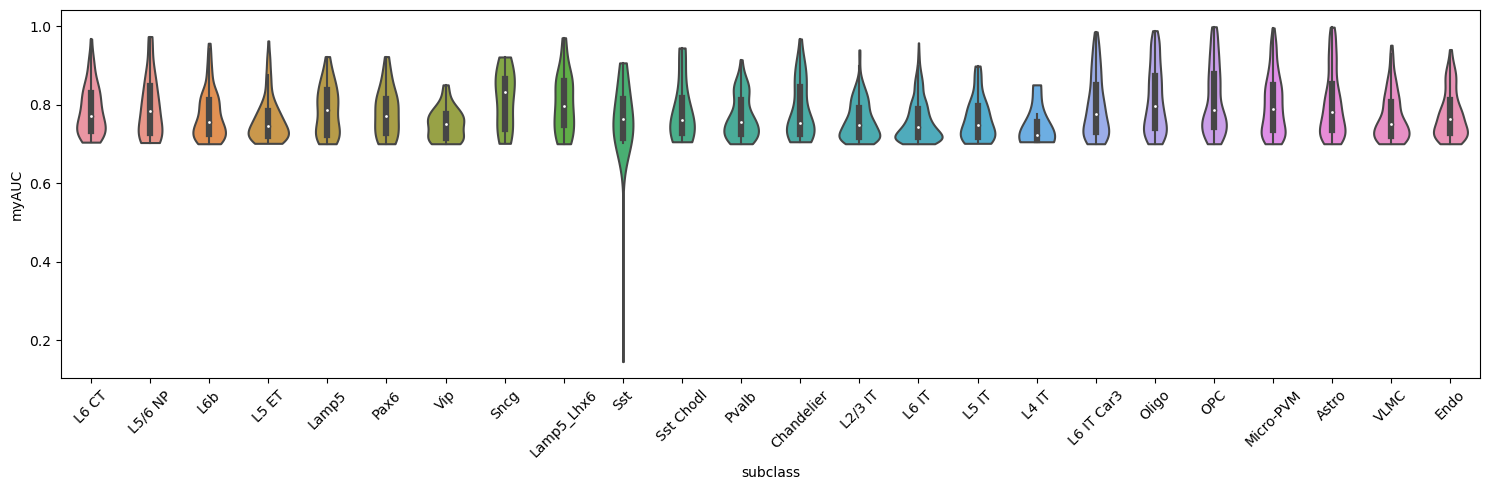

In [14]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(data=marker_genes_df, x='cluster', y='myAUC', ax=ax, cut=0)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_xlabel('subclass')
plt.tight_layout()

In [10]:
marker_medians = marker_genes_df.groupby('cluster').median()
marker_medians

myAUC   avg_diff  power  avg_logFC   pct.1   pct.2  avg_log2FC
cluster                                                                    
Astro       0.7830   0.957221  0.566        NaN  0.7490  0.1690    1.380978
Chandelier  0.7550   4.786125  0.510   4.786125  0.8135  0.3485         NaN
Endo        0.7630   1.383638  0.526        NaN  0.6420  0.1330    1.996167
L2/3 IT     0.7490  16.340596  0.498  16.340596  0.9200  0.6380         NaN
L4 IT       0.7220   1.290819  0.444   1.290819  0.7250  0.2190         NaN
L5 ET       0.7450   2.048902  0.490   2.048902  0.8145  0.4145         NaN
L5 IT       0.7475   4.715834  0.495   4.715834  0.8160  0.4210         NaN
L5/6 NP     0.7845   5.046857  0.569   5.046857  0.8675  0.3845         NaN
L6 CT       0.7720   4.537835  0.544   4.537835  0.8555  0.4165         NaN
L6 IT       0.7430   5.767876  0.486   5.767876  0.9440  0.7400         NaN
L6 IT Car3  0.7775   5.582668  0.555   5.582668  0.8700  0.4590         NaN
L6b         0.7560   6.232246  0.512   6.232246  0.9070  0.5490         NaN
Lamp5       0.7860  16.315609  0.572  16.315609  0.8140  0.3490         NaN
Lamp5_Lhx6  0.7980   5.541134  0.596   5.541134  0.8100  0.3150         NaN
Micro-PVM   0.7900   1.327389  0.580        NaN  0.6870  0.1250    1.915018
OPC         0.7870   0.896574  0.574        NaN  0.7965  0.2050    1.293483
Oligo       0.7960   1.106679  0.592        NaN  0.8050  0.3400    1.596600
Pax6        0.7720   4.625202  0.544   4.625202  0.7740  0.3430         NaN
Pvalb       0.7565  12.114753  0.513  12.114753  0.8735  0.4660         NaN
Sncg        0.8330   9.986426  0.666   9.986426  0.9420  0.3780         NaN
Sst         0.7630  13.698720  0.532  13.698720  0.8310  0.4060         NaN
Sst Chodl   0.7610  15.664634  0.522  15.664634  0.7130  0.1975         NaN
VLMC        0.7510   1.388545  0.502        NaN  0.6120  0.1260    2.003248
Vip         0.7510  12.685202  0.502  12.685202  0.7120  0.2845         NaN

In [11]:
marker_means = marker_genes_df.groupby('cluster').mean()
marker_means

myAUC   avg_diff     power  avg_logFC     pct.1     pct.2  \
cluster                                                                    
Astro       0.802524   1.119335  0.605049        NaN  0.743529  0.228791   
Chandelier  0.786690  14.125098  0.573381  14.125098  0.800214  0.383952   
Endo        0.775950   1.470339  0.551899        NaN  0.655668  0.187367   
L2/3 IT     0.760031        NaN  0.520062        NaN  0.875492  0.598829   
L4 IT       0.744571   4.551451  0.489143   4.551451  0.684429  0.254714   
L5 ET       0.761452   3.488310  0.522903   3.488310  0.792137  0.422718   
L5 IT       0.763091   6.697760  0.526182   6.697760  0.809159  0.426636   
L5/6 NP     0.791433   9.805490  0.582867   9.805490  0.827300  0.431033   
L6 CT       0.786562   9.444954  0.573125   9.444954  0.837156  0.459703   
L6 IT       0.759092  10.614155  0.518184  10.614155  0.905554  0.684870   
L6 IT Car3  0.796427  10.565277  0.592853  10.565277  0.834592  0.468399   
L6b         0.773060  14.096457  0.546121  14.096457  0.854490  0.550617   
Lamp5       0.786788        NaN  0.573577        NaN  0.817654  0.440731   
Lamp5_Lhx6  0.803857   8.847097  0.607714   8.847097  0.802857  0.367357   
Micro-PVM   0.801508   1.420110  0.603016        NaN  0.696771  0.194668   
OPC         0.813609   1.075216  0.627217        NaN  0.786498  0.257145   
Oligo       0.812122   1.207300  0.624244        NaN  0.792398  0.383387   
Pax6        0.782815  10.006455  0.565630  10.006455  0.767667  0.356704   
Pvalb       0.769398  23.193304  0.538795  23.193304  0.834068  0.495625   
Sncg        0.814333  24.831805  0.628667  24.831805  0.835500  0.434583   
Sst         0.757757  26.305693  0.553784  26.305693  0.819216  0.471189   
Sst Chodl   0.785625  32.503528  0.571250  32.503528  0.758500  0.319188   
VLMC        0.768719   1.485227  0.537439        NaN  0.638309  0.173101   
Vip         0.752000        NaN  0.504000        NaN  0.736250  0.356107   

            avg_log2FC  
cluster                 
Astro         1.614859  
Chandelier         NaN  
Endo          2.121251  
L2/3 IT            NaN  
L4 IT              NaN  
L5 ET              NaN  
L5 IT              NaN  
L5/6 NP            NaN  
L6 CT              NaN  
L6 IT              NaN  
L6 IT Car3         NaN  
L6b                NaN  
Lamp5              NaN  
Lamp5_Lhx6         NaN  
Micro-PVM     2.048786  
OPC           1.551209  
Oligo         1.741765  
Pax6               NaN  
Pvalb              NaN  
Sncg               NaN  
Sst                NaN  
Sst Chodl          NaN  
VLMC          2.142730  
Vip                NaN

In [11]:
marker_genes_reduced = None
for cluster in marker_genes_df['cluster'].unique():
    thresh = marker_medians.loc[cluster]['myAUC']
    gene_filter = marker_genes_df[(marker_genes_df['cluster']==cluster) & (marker_genes_df['myAUC']>thresh)]
    if marker_genes_reduced is None:
        marker_genes_reduced = gene_filter
    else:
        marker_genes_reduced = marker_genes_reduced.append(gene_filter)

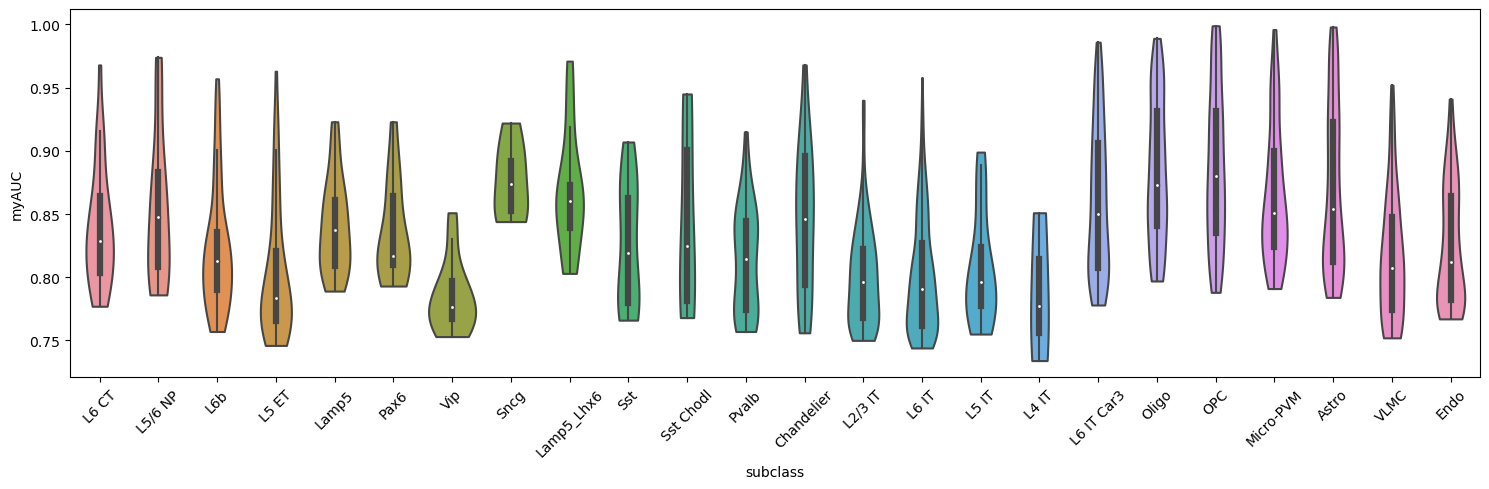

In [15]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.violinplot(data=marker_genes_reduced, x='cluster', y='myAUC', ax=ax, cut=0)
ax.tick_params(axis='x', labelrotation = 45)
ax.set_xlabel('subclass')
plt.tight_layout()

In [14]:
marker_genes_reduced.groupby('cluster').count()

Unnamed: 0  myAUC  avg_diff  power  avg_logFC  pct.1  pct.2  gene  \
cluster                                                                         
Astro              215    215       215    215          0    215    215   215   
Chandelier          21     21        21     21         21     21     21    21   
Endo                99     99        99     99          0     99     99    99   
L2/3 IT             95     95        95     95         95     95     95    95   
L4 IT                3      3         3      3          3      3      3     3   
L5 ET               62     62        62     62         62     62     62    62   
L5 IT               22     22        22     22         22     22     22    22   
L5/6 NP             30     30        30     30         30     30     30    30   
L6 CT               31     31        31     31         31     31     31    31   
L6 IT              325    325       325    325        325    325    325   325   
L6 IT Car3         109    109       109    109        109    109    109   109   
L6b                 74     74        74     74         74     74     74    74   
Lamp5               26     26        26     26         26     26     26    26   
Lamp5_Lhx6          21     21        21     21         21     21     21    21   
Micro-PVM          159    159       159    159          0    159    159   159   
OPC                206    206       206    206          0    206    206   206   
Oligo              139    139       139    139          0    139    139   139   
Pax6                13     13        13     13         13     13     13    13   
Pvalb               44     44        44     44         44     44     44    44   
Sncg                 6      6         6      6          6      6      6     6   
Sst                 18     18        18     18         18     18     18    18   
Sst Chodl            8      8         8      8          8      8      8     8   
VLMC                69     69        69     69          0     69     69    69   
Vip                 14     14        14     14         14     14     14    14   

            avg_log2FC  
cluster                 
Astro              215  
Chandelier           0  
Endo                99  
L2/3 IT              0  
L4 IT                0  
L5 ET                0  
L5 IT                0  
L5/6 NP              0  
L6 CT                0  
L6 IT                0  
L6 IT Car3           0  
L6b                  0  
Lamp5                0  
Lamp5_Lhx6           0  
Micro-PVM          159  
OPC                206  
Oligo              139  
Pax6                 0  
Pvalb                0  
Sncg                 0  
Sst                  0  
Sst Chodl            0  
VLMC                69  
Vip                  0

In [16]:
marker_genes = marker_genes_reduced['gene'].to_list()
print(f'starting with {len(marker_genes)} marker genes')
tg.pp_adatas(ad_sc, ad_sp, genes=marker_genes)

starting with 1809 marker genes


INFO:root:1294 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:14190 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


In [243]:
training_genes = [g.upper() for g in ad_sc.uns['training_genes']]
training_genes_df = marker_genes_df[marker_genes_df['gene'].isin(training_genes)]
training_genes_df.groupby('cluster').count()

Unnamed: 0  myAUC  avg_diff  power  avg_logFC  pct.1  pct.2  gene  \
cluster                                                                         
Astro              240    240       240    240          0    240    240   240   
Chandelier          21     21        21     21         21     21     21    21   
Endo               124    124       124    124          0    124    124   124   
L2/3 IT            109    109       109    109        109    109    109   109   
L4 IT                2      2         2      2          2      2      2     2   
L5 ET               51     51        51     51         51     51     51    51   
L5 IT               21     21        21     21         21     21     21    21   
L5/6 NP             30     30        30     30         30     30     30    30   
L6 CT               33     33        33     33         33     33     33    33   
L6 IT              314    314       314    314        314    314    314   314   
L6 IT Car3         117    117       117    117        117    117    117   117   
L6b                 77     77        77     77         77     77     77    77   
Lamp5               33     33        33     33         33     33     33    33   
Lamp5_Lhx6          22     22        22     22         22     22     22    22   
Micro-PVM          174    174       174    174          0    174    174   174   
OPC                262    262       262    262          0    262    262   262   
Oligo              148    148       148    148          0    148    148   148   
Pax6                13     13        13     13         13     13     13    13   
Pvalb               54     54        54     54         54     54     54    54   
Sncg                 8      8         8      8          8      8      8     8   
Sst                 24     24        24     24         24     24     24    24   
Sst Chodl            7      7         7      7          7      7      7     7   
VLMC                84     84        84     84          0     84     84    84   
Vip                 12     12        12     12         12     12     12    12   

            avg_log2FC  
cluster                 
Astro              240  
Chandelier           0  
Endo               124  
L2/3 IT              0  
L4 IT                0  
L5 ET                0  
L5 IT                0  
L5/6 NP              0  
L6 CT                0  
L6 IT                0  
L6 IT Car3           0  
L6b                  0  
Lamp5                0  
Lamp5_Lhx6           0  
Micro-PVM          174  
OPC                262  
Oligo              148  
Pax6                 0  
Pvalb                0  
Sncg                 0  
Sst                  0  
Sst Chodl            0  
VLMC                84  
Vip                  0

In [17]:
ad_sc

AnnData object with n_obs × n_vars = 89695 × 31609
    obs: 'cluster', 'subclass', 'neighborhood', 'class'
    var: 'n_cells'
    uns: 'training_genes', 'overlap_genes'
    layers: 'log_cpm'

In [18]:
ad_sp

AnnData object with n_obs × n_vars = 24479 × 16036
    obs: 'x', 'y', 'uniform_density', 'rna_count_based_density'
    var: 'n_cells'
    uns: 'training_genes', 'overlap_genes'

In [19]:
ad_sc.write(data_path + 'BGI_data/cDNA5/ad_sc_medianAUC_markers.h5ad')
ad_sp.write(data_path + 'BGI_data/cDNA5/ad_sp_medianAUC_markers.h5ad')

In [6]:
ad_sc_subclass = sc.read(data_path + 'BGI_data/cDNA5/tangram/subclass_bin100/ad_sc_medianAUC_markers.h5ad')
ad_sp_subclass = sc.read(data_path + 'BGI_data/cDNA5/tangram/subclass_bin100/ad_sp_medianAUC_markers.h5ad')

In [11]:
assert all(ad_sc_subclass.uns['training_genes'] == ad_sp_subclass.uns['training_genes'])

In [13]:
start = time.time()

ad_map = tg.map_cells_to_space(
    adata_sc=ad_sc_subclass,
    adata_sp=ad_sp_subclass,
    device='cpu',
    mode='clusters',
    cluster_label='subclass',
)

end = time.time()

print(f'{(end - start)/60} minutes elapsed')

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 1294 genes and rna_count_based density_prior in clusters mode...
INFO:root:Printing scores every 100 epochs.


Score: 0.304, KL reg: 0.271
Score: 0.423, KL reg: 0.001
Score: 0.425, KL reg: 0.001
Score: 0.426, KL reg: 0.001
Score: 0.426, KL reg: 0.001
Score: 0.426, KL reg: 0.001
Score: 0.426, KL reg: 0.001
Score: 0.426, KL reg: 0.001
Score: 0.426, KL reg: 0.001
Score: 0.426, KL reg: 0.001


INFO:root:Saving results..


102676.18007183075 minutes elapsed


In [14]:
(end - start)/60

28.521161131064098

In [17]:
ad_map.uns['train_genes_df']

train_score  sparsity_sc  sparsity_sp  sparsity_diff
dlg2       0.954392     0.000000     0.005352       0.005352
npy        0.948923     0.083333     0.683280       0.599946
ckb        0.936666     0.000000     0.066506       0.066506
syt1       0.931774     0.000000     0.143838       0.143838
plp1       0.920756     0.000000     0.030598       0.030598
...             ...          ...          ...            ...
p2ry12     0.059132     0.000000     0.997998       0.997998
fut9       0.053223     0.000000     0.998162       0.998162
socs6      0.046890     0.000000     0.998121       0.998121
hrh1       0.041539     0.000000     0.999020       0.999020
gpr63      0.037853     0.000000     0.999346       0.999346

[1294 rows x 4 columns]

In [18]:
ad_map.write(data_path + 'BGI_data/cDNA5/ad_map_subclass_medianAUC_markers.h5ad')
# ad_sp.write(data_path + 'BGI_data/cDNA5/tangram/subclass_bin100/ad_sp_medianAUC_markers.h5ad')
# ad_sc.write(data_path + 'BGI_data/cDNA5/tangram/subclass_bin100/ad_sc_medianAUC_markers.h5ad')

<IPython.core.display.Javascript object>


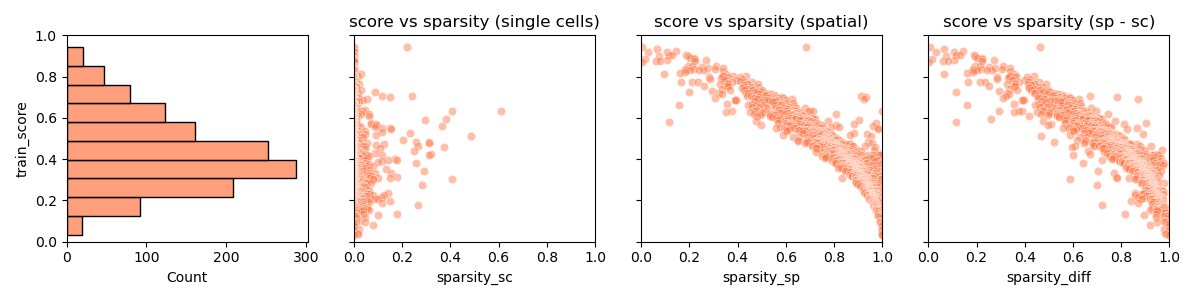

In [24]:
tg.plot_training_scores(ad_map, bins=10, alpha=.5)
# "If a gene is quite sparse in one dataset (typically, the spatial data) but not in other, the mapping score is lower" (last panel)

In [33]:
ex = ['L2/3 IT', 'L4 IT', 'L5 ET', 'L5 IT', 'L5/6 NP', 'L6 CT', 'L6 IT', 'L6 IT Car3', 'L6b']
inh = ['Pax6', 'Pvalb', 'Chandelier', 'Sncg', 'Sst', 'Sst Chodl', 'Vip', 'Lamp5', 'Lamp5_Lhx6']
nn = ['Astro', 'Endo', 'Micro-PVM', 'OPC', 'Oligo', 'VLMC']

In [52]:
tg.project_cell_annotations(ad_map, ad_sp, annotation='cluster')
annotation_list = ['L2/3 IT']
tg.plot_cell_annotation_sc(ad_sp, l23it_clusters,x='x', y='y',spot_size= 100, scale_factor=2,perc=0.02)

INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


<IPython.core.display.Javascript object>

In [44]:
l23it_clusters = [cl for cl in ad_sc.obs['cluster'].unique().to_list() if cl.startswith('L2/3 IT')]
l23it_clusters

['L2/3 IT_1',
 'L2/3 IT_3',
 'L2/3 IT_11',
 'L2/3 IT_12',
 'L2/3 IT_5',
 'L2/3 IT_16',
 'L2/3 IT_13',
 'L2/3 IT_9',
 'L2/3 IT_17',
 'L2/3 IT_2',
 'L2/3 IT_8',
 'L2/3 IT_14',
 'L2/3 IT_4',
 'L2/3 IT_7',
 'L2/3 IT_15',
 'L2/3 IT_10',
 'L2/3 IT_6']

In [55]:
ad_map_l23it = ad_map[ad_map.obs['cluster'].isin(l23it_clusters)]
ad_map_l23it.obs['cluster']

3      L2/3 IT_1
4     L2/3 IT_11
5      L2/3 IT_9
7     L2/3 IT_12
19    L2/3 IT_17
22    L2/3 IT_13
40     L2/3 IT_5
47     L2/3 IT_3
50    L2/3 IT_16
56    L2/3 IT_15
58    L2/3 IT_14
65     L2/3 IT_2
74    L2/3 IT_10
81     L2/3 IT_6
82     L2/3 IT_7
87     L2/3 IT_8
96     L2/3 IT_4
Name: cluster, dtype: category
Categories (17, object): ['L2/3 IT_1', 'L2/3 IT_2', 'L2/3 IT_3', 'L2/3 IT_4', ..., 'L2/3 IT_14', 'L2/3 IT_15', 'L2/3 IT_16', 'L2/3 IT_17']

INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


<IPython.core.display.Javascript object>


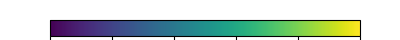

<IPython.core.display.Javascript object>

In [57]:
# when using 'robust' and 'perc' this is how min/max of colormap is being calculated:
# vmin = np.nanpercentile(data, perc)
# vmax = np.nanpercentile(data, 100 - perc)
# so perc=0.02 is 20-80

tg.plot_cell_annotation(ad_map_l23it, ad_sp, annotation='cluster', x='x', y='y', s=2, nrows=5, ncols=4, invert_y=False, robust=True, perc=0.02)

INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


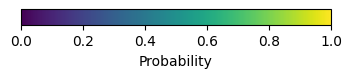

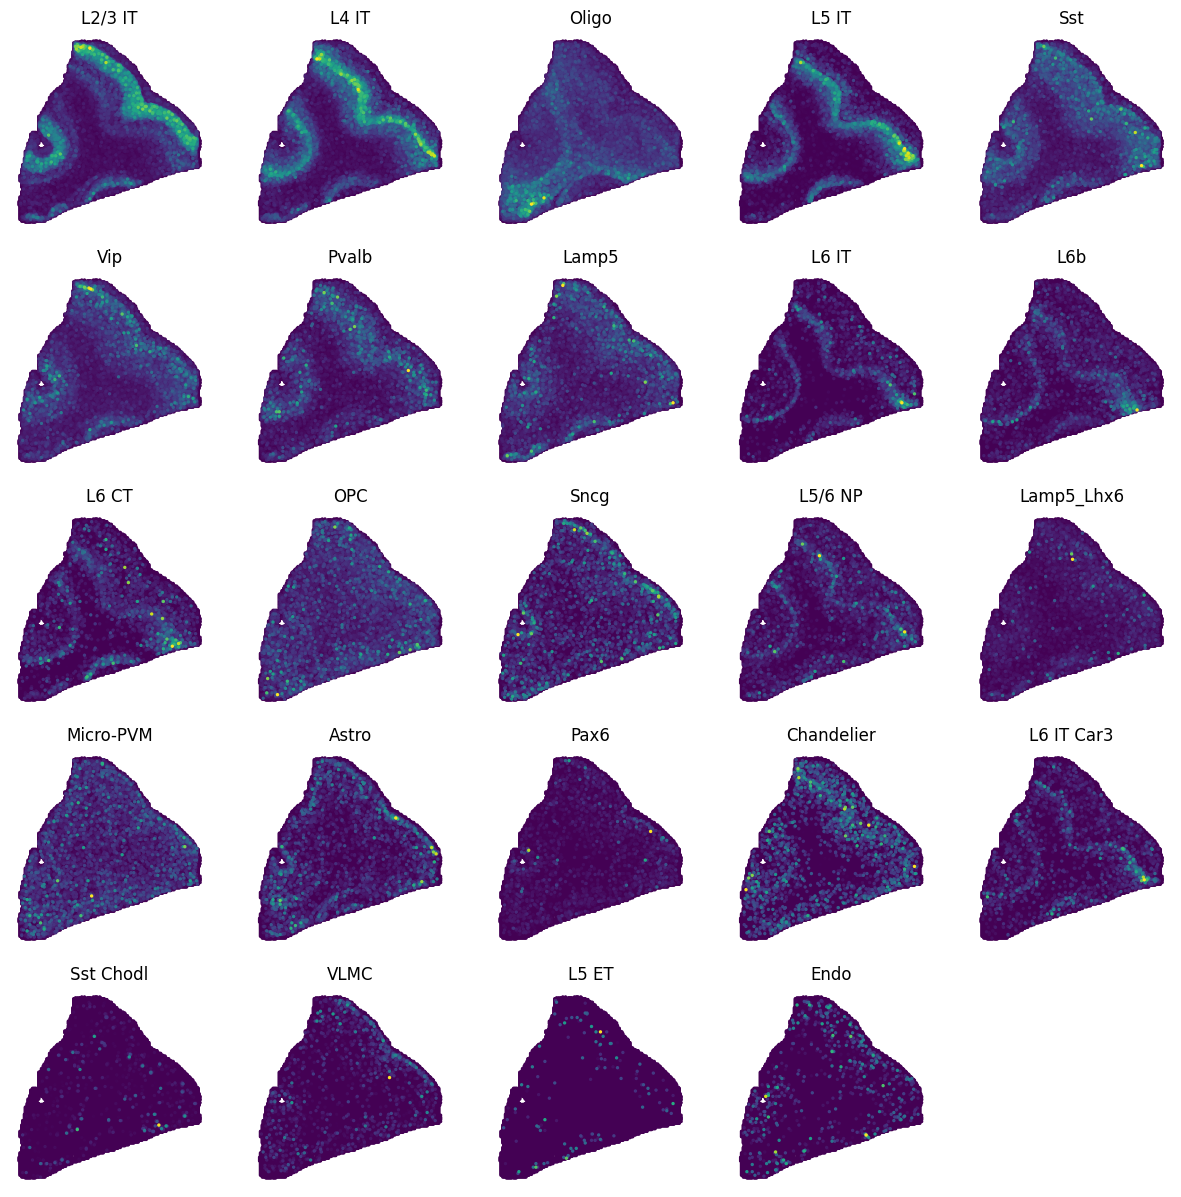

In [132]:
# raw probability

tg.plot_cell_annotation(ad_map, ad_sp, annotation='subclass', x='x', y='y', s=2, nrows=5, ncols=5, invert_y=False)#, robust=True, perc=0.02)

In [127]:
spatial_prob_subclass = ad_sp.obsm['tangram_ct_pred']
spatial_prob_subclass.head()

L2/3 IT_1    L2/3 IT_11     L2/3 IT_9  \
sample_cDNAD5:10000_10000  4.830311e-07  3.285756e-04  3.177761e-07   
sample_cDNAD5:10000_10100  8.445698e-07  3.502003e-07  5.500265e-05   
sample_cDNAD5:10000_10200  6.549533e-05  2.507483e-06  4.144554e-07   
sample_cDNAD5:10000_10300  1.214517e-04  1.003503e-06  1.922845e-04   
sample_cDNAD5:10000_10400  4.361815e-06  2.626411e-06  3.778896e-07   

                             L2/3 IT_12    L2/3 IT_17    L2/3 IT_13  \
sample_cDNAD5:10000_10000  1.646291e-06  2.318707e-06  4.012327e-07   
sample_cDNAD5:10000_10100  1.852458e-07  8.201553e-08  1.441248e-07   
sample_cDNAD5:10000_10200  1.656034e-04  8.064066e-07  9.452198e-08   
sample_cDNAD5:10000_10300  2.182890e-07  4.109938e-07  1.509714e-07   
sample_cDNAD5:10000_10400  1.860512e-04  4.326647e-07  2.829568e-06   

                              L2/3 IT_5     L2/3 IT_3    L2/3 IT_16  \
sample_cDNAD5:10000_10000  7.024671e-08  2.658048e-08  3.396937e-08   
sample_cDNAD5:10000_10100  9.098744e-08  6.973853e-08  1.507507e-08   
sample_cDNAD5:10000_10200  1.225140e-06  1.419940e-07  4.843976e-07   
sample_cDNAD5:10000_10300  4.096902e-07  1.934828e-08  9.272819e-08   
sample_cDNAD5:10000_10400  6.694112e-07  3.143912e-07  1.009624e-07   

                             L2/3 IT_15    L2/3 IT_14     L2/3 IT_2  \
sample_cDNAD5:10000_10000  3.715345e-08  9.432724e-08  1.350741e-07   
sample_cDNAD5:10000_10100  1.134449e-07  7.127708e-08  2.692349e-08   
sample_cDNAD5:10000_10200  2.106956e-05  8.317041e-08  4.816930e-07   
sample_cDNAD5:10000_10300  1.742732e-07  1.802833e-07  2.987941e-07   
sample_cDNAD5:10000_10400  4.963076e-07  1.803045e-03  2.149046e-07   

                             L2/3 IT_10     L2/3 IT_6     L2/3 IT_7  \
sample_cDNAD5:10000_10000  8.981775e-08  1.402912e-07  1.971638e-08   
sample_cDNAD5:10000_10100  1.912472e-08  6.342508e-08  8.300526e-08   
sample_cDNAD5:10000_10200  6.805036e-08  1.267484e-07  6.881174e-08   
sample_cDNAD5:10000_10300  9.885122e-07  3.322502e-08  7.813672e-08   
sample_cDNAD5:10000_10400  1.238504e-07  4.680710e-08  4.930842e-08   

                              L2/3 IT_8     L2/3 IT_4  
sample_cDNAD5:10000_10000  2.057792e-07  1.399210e-07  
sample_cDNAD5:10000_10100  9.714464e-08  3.253101e-08  
sample_cDNAD5:10000_10200  1.680601e-07  3.844248e-08  
sample_cDNAD5:10000_10300  4.898520e-04  3.516535e-08  
sample_cDNAD5:10000_10400  2.417181e-05  4.386125e-08

In [59]:
spatial_prob.describe()

L2/3 IT_1    L2/3 IT_11     L2/3 IT_9    L2/3 IT_12    L2/3 IT_17  \
count  2.447900e+04  2.447900e+04  2.447900e+04  2.447900e+04  2.447900e+04   
mean   4.085135e-05  4.085132e-05  4.085136e-05  4.085135e-05  4.085134e-05   
std    9.431076e-05  1.140608e-04  1.140368e-04  1.239455e-04  1.058776e-04   
min    3.077587e-09  2.450405e-09  1.953772e-09  2.962586e-09  3.043776e-09   
25%    2.842502e-07  4.216062e-07  4.004973e-07  3.791282e-07  3.378822e-07   
50%    9.835315e-07  1.296947e-06  1.225806e-06  1.116426e-06  9.742647e-07   
75%    1.476577e-05  9.403902e-06  7.854330e-06  5.378835e-06  6.228673e-06   
max    1.175780e-03  1.578958e-03  1.756767e-03  2.100955e-03  1.650474e-03   

         L2/3 IT_13     L2/3 IT_5     L2/3 IT_3    L2/3 IT_16    L2/3 IT_15  \
count  2.447900e+04  2.447900e+04  2.447900e+04  2.447900e+04  2.447900e+04   
mean   4.085135e-05  4.085135e-05  4.085130e-05  4.085135e-05  4.085134e-05   
std    2.070119e-04  2.432733e-04  3.363779e-04  3.587723e-04  3.863188e-04   
min    1.666822e-09  2.436000e-09  1.601153e-09  1.350726e-09  1.472188e-09   
25%    8.377079e-08  7.895813e-08  4.837154e-08  3.217184e-08  4.011084e-08   
50%    1.921372e-07  1.609791e-07  9.648362e-08  6.144960e-08  7.847621e-08   
75%    5.546017e-07  3.919400e-07  2.395638e-07  1.372220e-07  1.829729e-07   
max    3.233739e-03  6.112510e-03  6.950267e-03  9.759827e-03  9.559139e-03   

         L2/3 IT_14     L2/3 IT_2    L2/3 IT_10     L2/3 IT_6     L2/3 IT_7  \
count  2.447900e+04  2.447900e+04  2.447900e+04  2.447900e+04  2.447900e+04   
mean   4.085135e-05  4.085134e-05  4.085134e-05  4.085134e-05  4.085133e-05   
std    4.432888e-04  4.210575e-04  3.678755e-04  4.027200e-04  6.054858e-04   
min    1.456161e-09  2.044206e-09  3.173356e-09  2.106097e-09  8.183442e-10   
25%    4.437422e-08  4.472618e-08  7.456083e-08  3.889986e-08  2.417274e-08   
50%    8.809472e-08  8.462215e-08  1.375073e-07  7.161865e-08  4.311541e-08   
75%    2.062876e-07  1.893625e-07  2.988576e-07  1.512890e-07  8.226820e-08   
max    1.285523e-02  1.229537e-02  1.099967e-02  1.246002e-02  3.352827e-02   

          L2/3 IT_8     L2/3 IT_4  
count  2.447900e+04  2.447900e+04  
mean   4.085135e-05  4.085135e-05  
std    2.890315e-04  5.563239e-04  
min    2.859027e-09  3.274738e-09  
25%    9.629697e-08  5.562200e-08  
50%    1.842590e-07  1.024693e-07  
75%    4.302681e-07  2.031610e-07  
max    6.084647e-03  2.102262e-02

In [60]:
(.00009 - 3e-9) / (4.8e-4 - 3e-9)

0.1874949218432615

In [69]:
spatial_prob_norm = (spatial_prob - spatial_prob.min()) / (spatial_prob.max() - spatial_prob.min())
spatial_prob_norm.head()

L2/3 IT_1  L2/3 IT_11  L2/3 IT_9  L2/3 IT_12  \
sample_cDNAD5:10000_10000   0.000408    0.208095   0.000180    0.000782   
sample_cDNAD5:10000_10100   0.000716    0.000220   0.031308    0.000087   
sample_cDNAD5:10000_10200   0.055701    0.001587   0.000235    0.078822   
sample_cDNAD5:10000_10300   0.103292    0.000634   0.109453    0.000102   
sample_cDNAD5:10000_10400   0.003707    0.001662   0.000214    0.088554   

                           L2/3 IT_17  L2/3 IT_13  L2/3 IT_5  L2/3 IT_3  \
sample_cDNAD5:10000_10000    0.001403    0.000124   0.000011   0.000004   
sample_cDNAD5:10000_10100    0.000048    0.000044   0.000014   0.000010   
sample_cDNAD5:10000_10200    0.000487    0.000029   0.000200   0.000020   
sample_cDNAD5:10000_10300    0.000247    0.000046   0.000067   0.000003   
sample_cDNAD5:10000_10400    0.000260    0.000874   0.000109   0.000045   

                           L2/3 IT_16  L2/3 IT_15  L2/3 IT_14  L2/3 IT_2  \
sample_cDNAD5:10000_10000    0.000003    0.000004    0.000007   0.000011   
sample_cDNAD5:10000_10100    0.000001    0.000012    0.000005   0.000002   
sample_cDNAD5:10000_10200    0.000049    0.002204    0.000006   0.000039   
sample_cDNAD5:10000_10300    0.000009    0.000018    0.000014   0.000024   
sample_cDNAD5:10000_10400    0.000010    0.000052    0.140258   0.000017   

                           L2/3 IT_10  L2/3 IT_6     L2/3 IT_7  L2/3 IT_8  \
sample_cDNAD5:10000_10000    0.000008   0.000011  5.636447e-07   0.000033   
sample_cDNAD5:10000_10100    0.000001   0.000005  2.451272e-06   0.000015   
sample_cDNAD5:10000_10200    0.000006   0.000010  2.027942e-06   0.000027   
sample_cDNAD5:10000_10300    0.000090   0.000002  2.306065e-06   0.080506   
sample_cDNAD5:10000_10400    0.000011   0.000004  1.446244e-06   0.003972   

                           L2/3 IT_4  
sample_cDNAD5:10000_10000   0.000006  
sample_cDNAD5:10000_10100   0.000001  
sample_cDNAD5:10000_10200   0.000002  
sample_cDNAD5:10000_10300   0.000002  
sample_cDNAD5:10000_10400   0.000002

In [70]:
max_prop = spatial_prob_norm.max(axis=1)
max_prop.name = 'cluster_prop'
max_subclass = spatial_prob_norm.idxmax(axis=1)
max_subclass.name = 'cluster'

spatial_prob_norm = spatial_prob_norm.merge(max_subclass, left_index=True, right_index=True)
spatial_prob_norm = spatial_prob_norm.merge(max_prop, left_index=True, right_index=True)
spatial_prob_norm.head()

L2/3 IT_1  L2/3 IT_11  L2/3 IT_9  L2/3 IT_12  \
sample_cDNAD5:10000_10000   0.000408    0.208095   0.000180    0.000782   
sample_cDNAD5:10000_10100   0.000716    0.000220   0.031308    0.000087   
sample_cDNAD5:10000_10200   0.055701    0.001587   0.000235    0.078822   
sample_cDNAD5:10000_10300   0.103292    0.000634   0.109453    0.000102   
sample_cDNAD5:10000_10400   0.003707    0.001662   0.000214    0.088554   

                           L2/3 IT_17  L2/3 IT_13  L2/3 IT_5  L2/3 IT_3  \
sample_cDNAD5:10000_10000    0.001403    0.000124   0.000011   0.000004   
sample_cDNAD5:10000_10100    0.000048    0.000044   0.000014   0.000010   
sample_cDNAD5:10000_10200    0.000487    0.000029   0.000200   0.000020   
sample_cDNAD5:10000_10300    0.000247    0.000046   0.000067   0.000003   
sample_cDNAD5:10000_10400    0.000260    0.000874   0.000109   0.000045   

                           L2/3 IT_16  L2/3 IT_15  L2/3 IT_14  L2/3 IT_2  \
sample_cDNAD5:10000_10000    0.000003    0.000004    0.000007   0.000011   
sample_cDNAD5:10000_10100    0.000001    0.000012    0.000005   0.000002   
sample_cDNAD5:10000_10200    0.000049    0.002204    0.000006   0.000039   
sample_cDNAD5:10000_10300    0.000009    0.000018    0.000014   0.000024   
sample_cDNAD5:10000_10400    0.000010    0.000052    0.140258   0.000017   

                           L2/3 IT_10  L2/3 IT_6     L2/3 IT_7  L2/3 IT_8  \
sample_cDNAD5:10000_10000    0.000008   0.000011  5.636447e-07   0.000033   
sample_cDNAD5:10000_10100    0.000001   0.000005  2.451272e-06   0.000015   
sample_cDNAD5:10000_10200    0.000006   0.000010  2.027942e-06   0.000027   
sample_cDNAD5:10000_10300    0.000090   0.000002  2.306065e-06   0.080506   
sample_cDNAD5:10000_10400    0.000011   0.000004  1.446244e-06   0.003972   

                           L2/3 IT_4     cluster  cluster_prop  
sample_cDNAD5:10000_10000   0.000006  L2/3 IT_11      0.208095  
sample_cDNAD5:10000_10100   0.000001   L2/3 IT_9      0.031308  
sample_cDNAD5:10000_10200   0.000002  L2/3 IT_12      0.078822  
sample_cDNAD5:10000_10300   0.000002   L2/3 IT_9      0.109453  
sample_cDNAD5:10000_10400   0.000002  L2/3 IT_14      0.140258

In [71]:
spatial_prob_norm['x'] = spatial_prob_norm.apply(lambda x: float(x.name.split(':')[1].split('_')[0]), axis=1)
spatial_prob_norm['y'] = spatial_prob_norm.apply(lambda x: float(x.name.split(':')[1].split('_')[1]), axis=1)

<IPython.core.display.Javascript object>


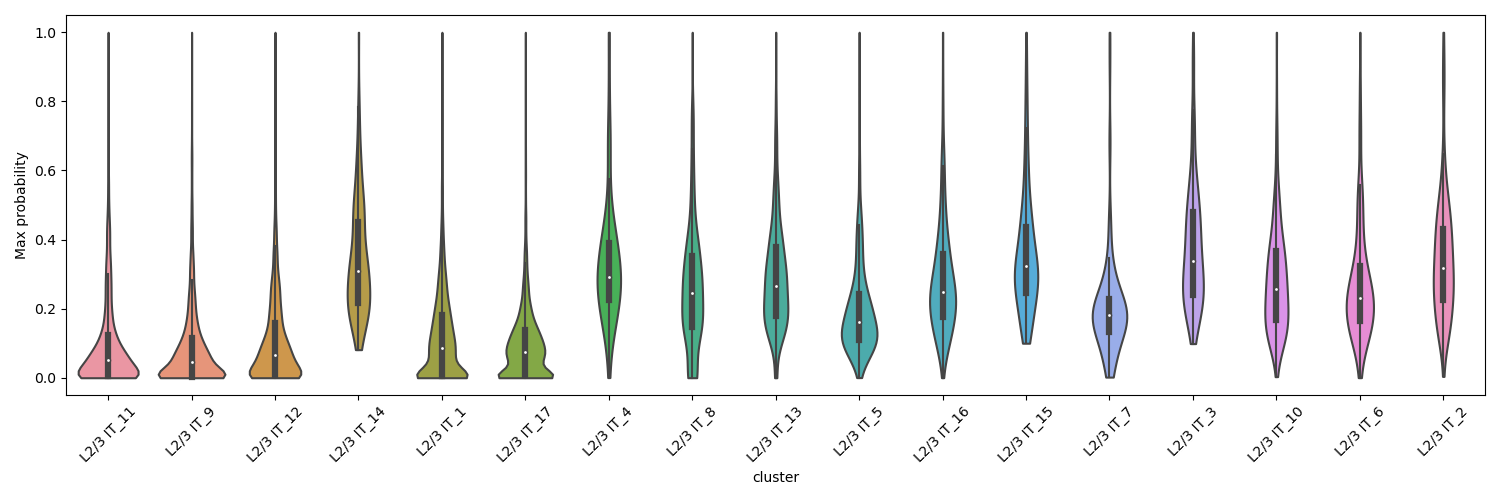

In [98]:
fig, ax = plt.subplots(figsize=(15,5))
sns.violinplot(data=spatial_prob_norm, x='cluster', y='cluster_prop', cut=0, ax=ax, sort=True)
ax.set_ylabel('Max probability')
ax.tick_params(axis='x', labelrotation = 45)
# ax.axhline(0.2, ls='--', c='grey')
plt.tight_layout()

In [94]:
good_clusters = ['L2/3 IT_3', 'L2/3 IT_4', 'L2/3 IT_6', 'L2/3 IT_8', 'L2/3 IT_10', 'L2/3 IT_13', 
              'L2/3 IT_14', 'L2/3 IT_15', 'L2/3 IT_16']
good_l23_clusters = spatial_prob_norm[spatial_prob_norm['cluster'].isin(good_clusters)]
good_l23_clusters.head()

L2/3 IT_1  L2/3 IT_11  L2/3 IT_9  L2/3 IT_12  \
sample_cDNAD5:10000_10400   0.003707    0.001662   0.000214    0.088554   
sample_cDNAD5:10000_12300   0.000385    0.001545   0.008793    0.001134   
sample_cDNAD5:10000_16600   0.000203    0.001179   0.000257    0.000095   
sample_cDNAD5:10000_18900   0.000575    0.000391   0.000017    0.000098   
sample_cDNAD5:10000_19900   0.002533    0.000329   0.000763    0.000241   

                           L2/3 IT_17  L2/3 IT_13  L2/3 IT_5  L2/3 IT_3  \
sample_cDNAD5:10000_10400    0.000260    0.000874   0.000109   0.000045   
sample_cDNAD5:10000_12300    0.003038    0.000076   0.000034   0.000025   
sample_cDNAD5:10000_16600    0.000091    0.000023   0.000301   0.000002   
sample_cDNAD5:10000_18900    0.000062    0.178148   0.000010   0.000007   
sample_cDNAD5:10000_19900    0.000071    0.000071   0.000013   0.000025   

                           L2/3 IT_16  L2/3 IT_15  ...  L2/3 IT_2  L2/3 IT_10  \
sample_cDNAD5:10000_10400    0.000010    0.000052  ...   0.000017    0.000011   
sample_cDNAD5:10000_12300    0.000008    0.000014  ...   0.000017    0.000026   
sample_cDNAD5:10000_16600    0.000003    0.000002  ...   0.000010    0.000009   
sample_cDNAD5:10000_18900    0.000004    0.000028  ...   0.000059    0.000006   
sample_cDNAD5:10000_19900    0.000014    0.000009  ...   0.000004    0.000009   

                           L2/3 IT_6     L2/3 IT_7  L2/3 IT_8  L2/3 IT_4  \
sample_cDNAD5:10000_10400   0.000004  1.446244e-06   0.003972   0.000002   
sample_cDNAD5:10000_12300   0.000020  1.919429e-07   0.000032   0.273050   
sample_cDNAD5:10000_16600   0.000015  8.518589e-07   0.004114   0.000006   
sample_cDNAD5:10000_18900   0.000006  3.699902e-07   0.000033   0.000003   
sample_cDNAD5:10000_19900   0.000003  8.483760e-07   0.553512   0.000008   

                              cluster cluster_prop        x        y  
sample_cDNAD5:10000_10400  L2/3 IT_14     0.140258  10000.0  10400.0  
sample_cDNAD5:10000_12300   L2/3 IT_4     0.273050  10000.0  12300.0  
sample_cDNAD5:10000_16600   L2/3 IT_8     0.004114  10000.0  16600.0  
sample_cDNAD5:10000_18900  L2/3 IT_13     0.178148  10000.0  18900.0  
sample_cDNAD5:10000_19900   L2/3 IT_8     0.553512  10000.0  19900.0  

[5 rows x 21 columns]

<IPython.core.display.Javascript object>


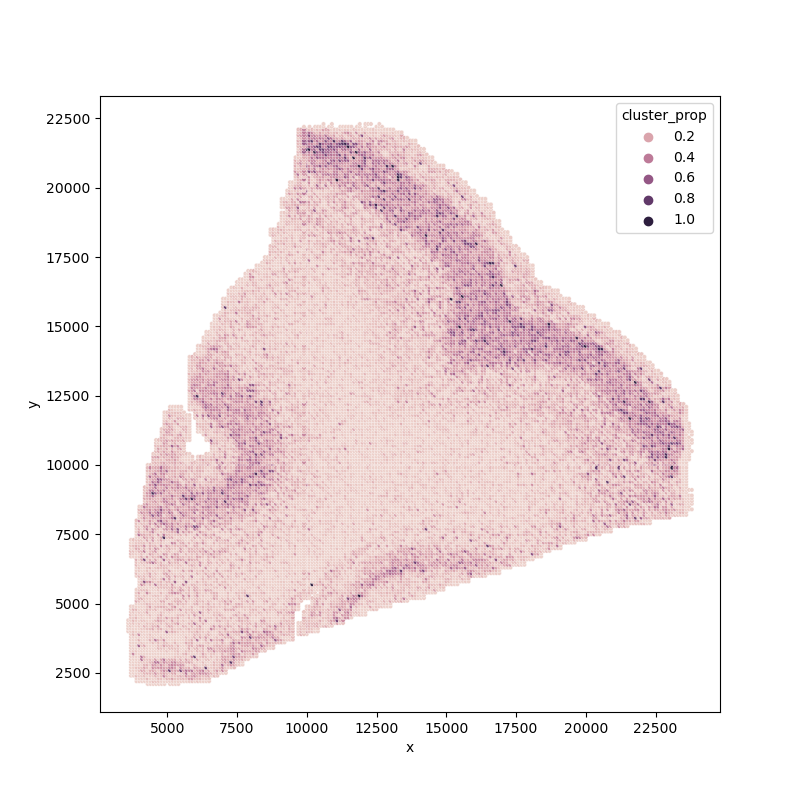

<AxesSubplot:xlabel='x', ylabel='y'>

In [99]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
sns.scatterplot(data=spatial_prob_norm, x='x', y='y', hue='cluster_prop', s=10, alpha=1, lw=0, ax=ax,)

<IPython.core.display.Javascript object>


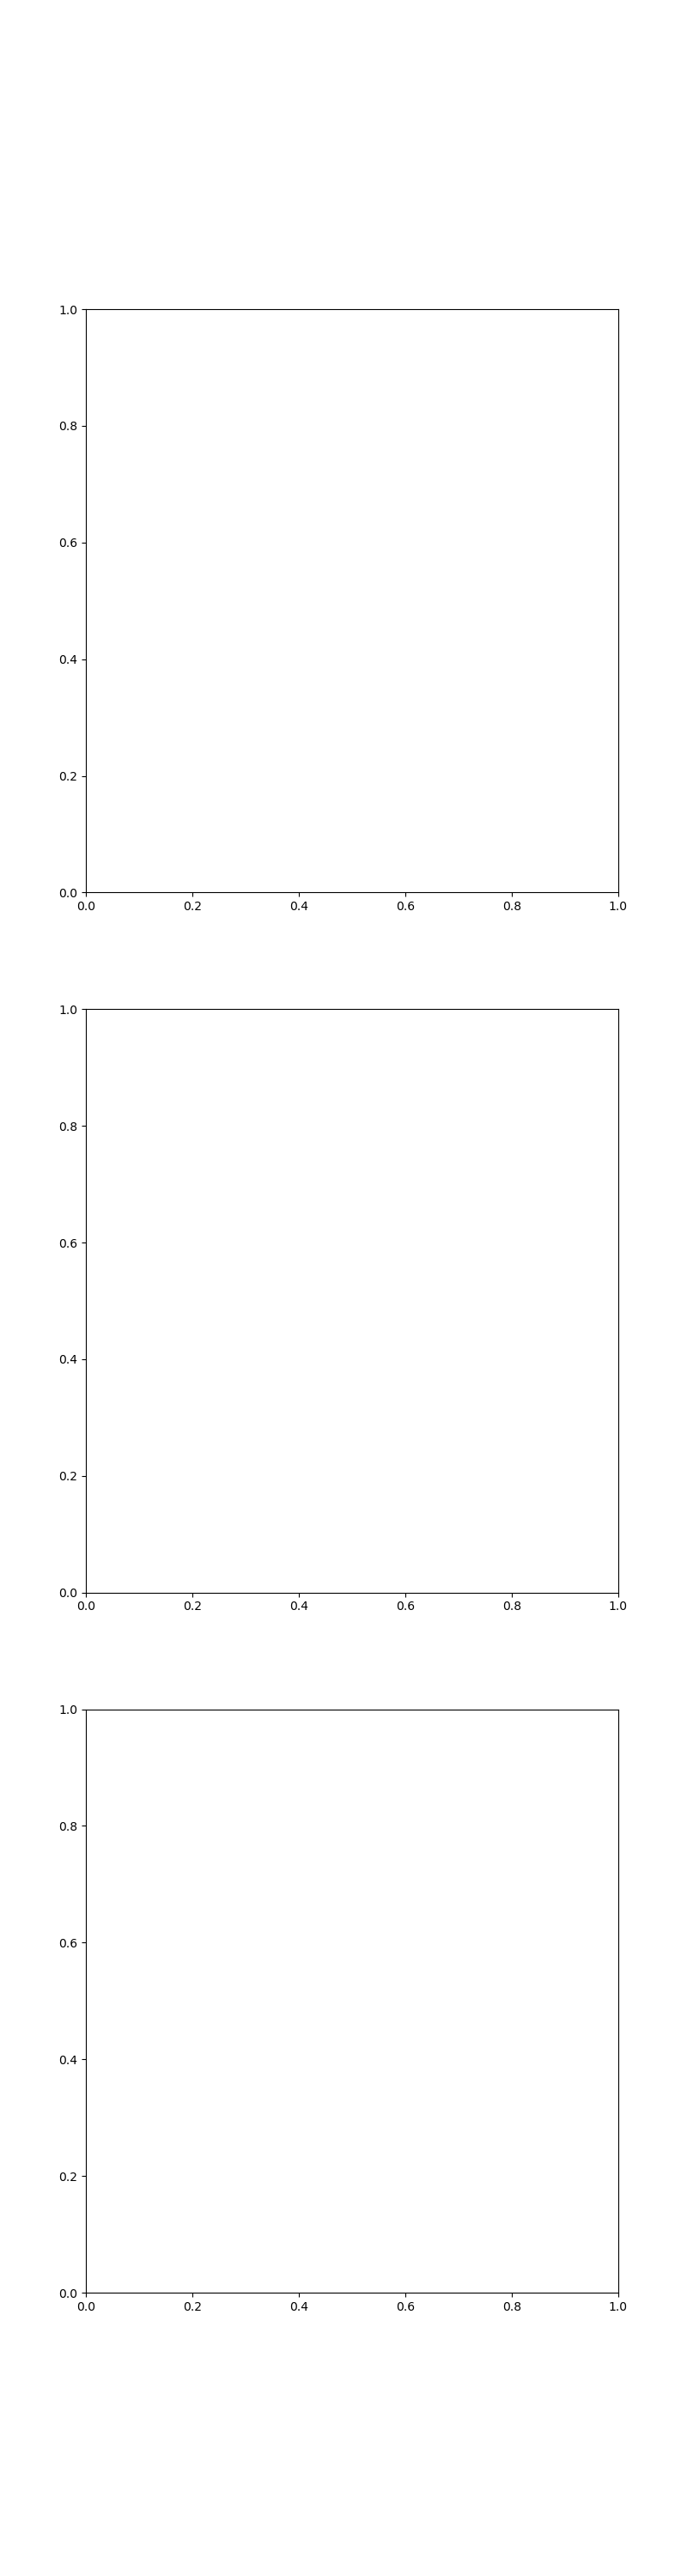

NameError: name 'ex' is not defined

In [74]:
fig, ax = plt.subplots(3, 1, figsize=(8, 30))
for i, clas in enumerate([ex, inh, nn]):
    sns.scatterplot(data=spatial_prob_norm[spatial_prob_norm['subclass'].isin(clas)], x='x', y='y', 
                    hue='subclass', s=10, alpha=0.7, lw=0, ax=ax[i], hue_order=clas)

<IPython.core.display.Javascript object>


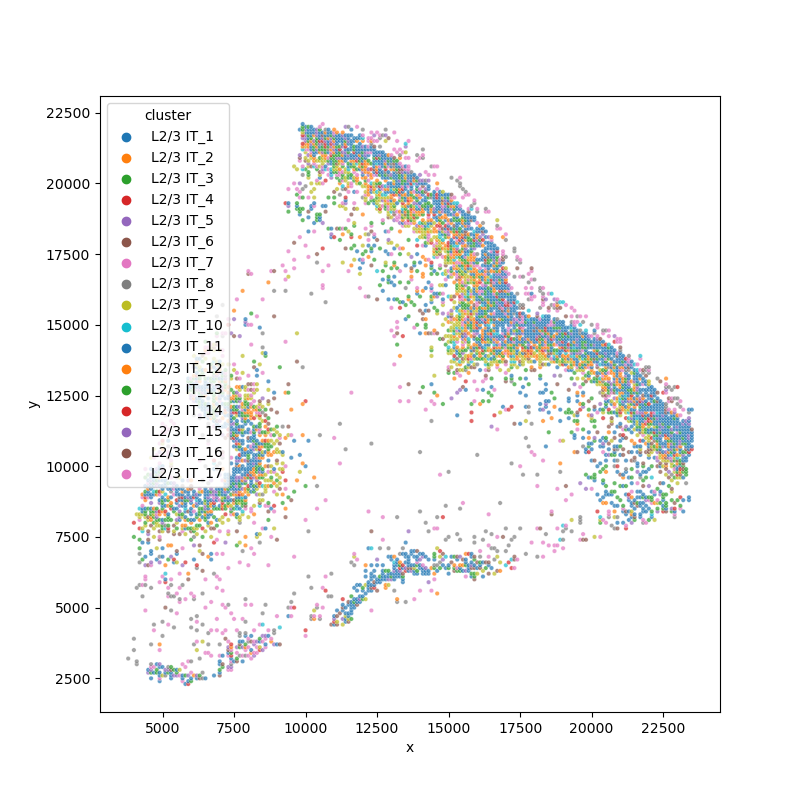

<AxesSubplot:xlabel='x', ylabel='y'>

In [117]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.scatterplot(data=spatial_prob_norm[spatial_prob_norm['cluster_prop']>0.2], x='x', y='y', hue='cluster', s=10, alpha=0.7, lw=0, ax=ax, 
                hue_order=[f'L2/3 IT_{i}' for i in range(1, 18)], palette='tab10')

In [258]:
ad_map.uns['train_genes_df']

train_score  sparsity_sc  sparsity_sp  sparsity_diff
dlg2       0.954377     0.000000     0.005352       0.005352
npy        0.948374     0.083333     0.683280       0.599946
ckb        0.936682     0.000000     0.066506       0.066506
syt1       0.931832     0.000000     0.143838       0.143838
plp1       0.920726     0.000000     0.030598       0.030598
...             ...          ...          ...            ...
p2ry12     0.059096     0.000000     0.997998       0.997998
fut9       0.053315     0.000000     0.998162       0.998162
socs6      0.046855     0.000000     0.998121       0.998121
hrh1       0.041494     0.000000     0.999020       0.999020
gpr63      0.037916     0.000000     0.999346       0.999346

[1294 rows x 4 columns]

In [97]:
len(ad_sc.uns['overlap_genes'])

14190

In [99]:
total_counts_sp = ad_sp[:, ad_sp.uns['overlap_genes']].X.sum(axis=0)
total_counts_sc = ad_sc[:, ad_sc.uns['overlap_genes']].X.sum(axis=0)

In [113]:
total_counts_sc = np.asarray(total_counts_sc)[0]

(0.1, 20000000.0)

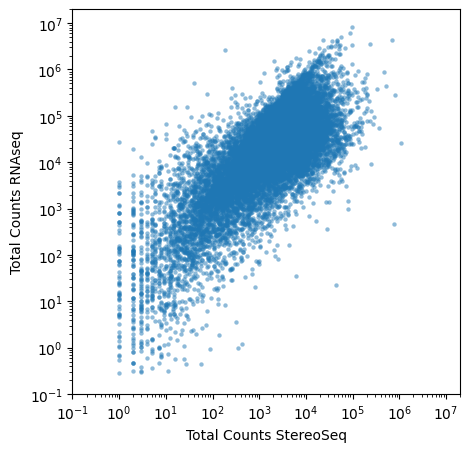

In [128]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(total_counts_sp, total_counts_sc, alpha=0.5, s=10, lw=0)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Total Counts RNAseq')
ax.set_xlabel('Total Counts StereoSeq')
ax.set_xlim([0.1, 2e7])
ax.set_ylim([0.1, 2e7])

In [204]:
from scipy import stats

stats.spearmanr(total_counts_sp, total_counts_sc)

SpearmanrResult(correlation=0.7065826228217453, pvalue=0.0)

In [199]:
print(sum(ad_map.X[:,0]))
ad_map.X[:, 0]

0.0007892382334588888


array([8.9833855e-05, 4.8757066e-08, 3.8636477e-05, 5.3437469e-07,
       4.3331761e-06, 5.6393834e-05, 1.6307007e-05, 1.7026354e-05,
       9.2350041e-07, 7.2157249e-08, 4.4280774e-04, 5.7134766e-05,
       5.5063975e-07, 1.1462254e-07, 6.2167288e-07, 6.3028208e-05,
       8.1420396e-08, 7.3460825e-08, 1.8568497e-07, 2.6287361e-07,
       1.4779064e-07, 3.3385277e-08, 1.5975296e-08, 7.0502786e-08],
      dtype=float32)

In [202]:
spatial_prob_norm[ex+inh+nn].sum(axis=1)

sample_cDNAD5:10000_10000    0.666813
sample_cDNAD5:10000_10100    0.497873
sample_cDNAD5:10000_10200    0.707912
sample_cDNAD5:10000_10300    0.659384
sample_cDNAD5:10000_10400    0.621522
                               ...   
sample_cDNAD5:9900_9500      0.632314
sample_cDNAD5:9900_9600      0.667008
sample_cDNAD5:9900_9700      0.665334
sample_cDNAD5:9900_9800      0.533098
sample_cDNAD5:9900_9900      0.577815
Length: 24479, dtype: float64

In [102]:
cluster_markers = pd.read_csv(data_path + 'rhesus_cluster_roc_markers.csv')
l23it_markers = cluster_markers
l23it_markers.head()

Unnamed: 0  p_val  avg_log2FC  pct.1  pct.2  p_val_adj    cluster     gene
0      GULP1    0.0    1.298655  0.891  0.343        0.0  L2/3 IT_1    GULP1
1      PDE1A    0.0    1.273288  0.989  0.756        0.0  L2/3 IT_1    PDE1A
2    ZNF804A    0.0    1.169823  0.902  0.644        0.0  L2/3 IT_1  ZNF804A
3      NETO1    0.0    1.073089  0.981  0.912        0.0  L2/3 IT_1    NETO1
4       SGK1    0.0    1.045216  0.892  0.610        0.0  L2/3 IT_1     SGK1

In [106]:
ad_map_subclass = sc.read(data_path + 'BGI_data/cDNA5/tangram/subclass_bin100/ad_map_subclass_medianAUC_markers.h5ad')
ad_sp_sublass = sc.read(data_path + 'BGI_data/cDNA5/tangram/subclass_bin100/ad_sp_medianAUC_markers.h5ad')

In [111]:
ad_sp_subclass = ad_sp
ad_map_subclass = ad_map

get bins that are labeled L2/3 IT vs all other bins. What is the CUX2 expression of these bins vs other bins. Try with a couple Subclass-marker pairs and cluster-marker pairs

In [132]:
ad_sp_subclass.obsm['spatial']

array([[10000., 10000.],
       [10000., 10100.],
       [10000., 10200.],
       ...,
       [ 9900.,  9700.],
       [ 9900.,  9800.],
       [ 9900.,  9900.]])

<IPython.core.display.Javascript object>


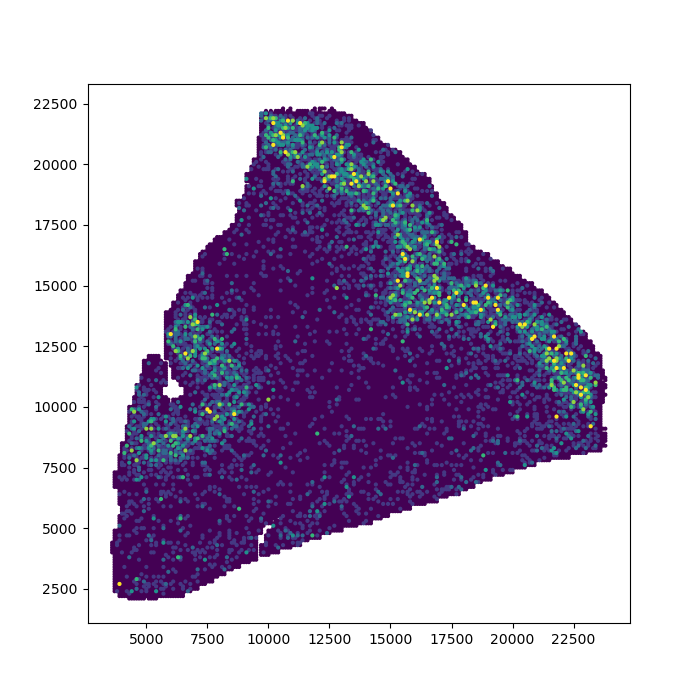

In [123]:
fig, ax = plt.subplots(figsize=(7,7))
tg.quick_plot_gene('cux2', ad_sp_subclass, s=4, robust=True, perc=0.2)

In [128]:
spatial_prob_subclass = ad_sp_subclass.obsm['tangram_ct_pred']
spatial_prob_subclass.head()

L2/3 IT_1    L2/3 IT_11     L2/3 IT_9  \
sample_cDNAD5:10000_10000  4.830311e-07  3.285756e-04  3.177761e-07   
sample_cDNAD5:10000_10100  8.445698e-07  3.502003e-07  5.500265e-05   
sample_cDNAD5:10000_10200  6.549533e-05  2.507483e-06  4.144554e-07   
sample_cDNAD5:10000_10300  1.214517e-04  1.003503e-06  1.922845e-04   
sample_cDNAD5:10000_10400  4.361815e-06  2.626411e-06  3.778896e-07   

                             L2/3 IT_12    L2/3 IT_17    L2/3 IT_13  \
sample_cDNAD5:10000_10000  1.646291e-06  2.318707e-06  4.012327e-07   
sample_cDNAD5:10000_10100  1.852458e-07  8.201553e-08  1.441248e-07   
sample_cDNAD5:10000_10200  1.656034e-04  8.064066e-07  9.452198e-08   
sample_cDNAD5:10000_10300  2.182890e-07  4.109938e-07  1.509714e-07   
sample_cDNAD5:10000_10400  1.860512e-04  4.326647e-07  2.829568e-06   

                              L2/3 IT_5     L2/3 IT_3    L2/3 IT_16  \
sample_cDNAD5:10000_10000  7.024671e-08  2.658048e-08  3.396937e-08   
sample_cDNAD5:10000_10100  9.098744e-08  6.973853e-08  1.507507e-08   
sample_cDNAD5:10000_10200  1.225140e-06  1.419940e-07  4.843976e-07   
sample_cDNAD5:10000_10300  4.096902e-07  1.934828e-08  9.272819e-08   
sample_cDNAD5:10000_10400  6.694112e-07  3.143912e-07  1.009624e-07   

                             L2/3 IT_15    L2/3 IT_14     L2/3 IT_2  \
sample_cDNAD5:10000_10000  3.715345e-08  9.432724e-08  1.350741e-07   
sample_cDNAD5:10000_10100  1.134449e-07  7.127708e-08  2.692349e-08   
sample_cDNAD5:10000_10200  2.106956e-05  8.317041e-08  4.816930e-07   
sample_cDNAD5:10000_10300  1.742732e-07  1.802833e-07  2.987941e-07   
sample_cDNAD5:10000_10400  4.963076e-07  1.803045e-03  2.149046e-07   

                             L2/3 IT_10     L2/3 IT_6     L2/3 IT_7  \
sample_cDNAD5:10000_10000  8.981775e-08  1.402912e-07  1.971638e-08   
sample_cDNAD5:10000_10100  1.912472e-08  6.342508e-08  8.300526e-08   
sample_cDNAD5:10000_10200  6.805036e-08  1.267484e-07  6.881174e-08   
sample_cDNAD5:10000_10300  9.885122e-07  3.322502e-08  7.813672e-08   
sample_cDNAD5:10000_10400  1.238504e-07  4.680710e-08  4.930842e-08   

                              L2/3 IT_8     L2/3 IT_4  
sample_cDNAD5:10000_10000  2.057792e-07  1.399210e-07  
sample_cDNAD5:10000_10100  9.714464e-08  3.253101e-08  
sample_cDNAD5:10000_10200  1.680601e-07  3.844248e-08  
sample_cDNAD5:10000_10300  4.898520e-04  3.516535e-08  
sample_cDNAD5:10000_10400  2.417181e-05  4.386125e-08